# Open Repository for Data Sciences - Documentation

The purpose of this notebook is to provide more detail surrounding the functions that are implemented in the Open Repository for Data Sciences learning tool. This document also gives the user an introduction to basic machine learning (ML) terminology and concepts that are fundamental to practicing data science.

Many of these functions utilize popular python data science libraries like `pandas`, `NumPy`, `matplotlib`, `Seaborn`, and `scikit-learn` to name a few.

* `pandas` - Pandas is a package for data manipulation and analysis. It offers flexible operations for manipulating tabular and time series data.

* `NumPy` - Numpy is a package for scientific computing which provides support for performing computations with multi-dimensional arrays and matrices. It also ships with a number of high-level mathematical functions to operate on these arrays.

* `matplotlib` - Matplotlib is python package for creating plots. `seaborn` came out later which was built on top of Maplotlib. Seaborn improved upon Matplotlib by developing a more concise syntax and integrating more attractive and informative statistical graphics. Seaborn is built to operate on dataframes and arrays.

* `scikit-learn` - Scikit-learn is an open-source python libarary for implementing ML algorithms. It features many popular choices for implementing classification, regression, and clustering algorithms.

These descriptions may in fact be a gross simplification of what you can do with these frameworks. However, this is a good starting point, especially if this is your first exposure to these tools. 

In [2]:
from data import load_dataframe, names

## List of named datasets

The learning tool ships with several different types of datasets. These are their names within the coding infrastructure. It is important to know their names if you want to be able to execute these functions yourself or modify existing functions in the source code.

In [3]:
names

['exam_scores', 'petroleum_consumption', 'study_hours', 'wine_quality']

### pandas DataFrames are the core data structure being operated on behind the scenes

The raw data files are stored within the project's `/data` directory. To transform the text file into an object we can operate on, the helper function `load_dataframe` is used. 

It is important to note that this function takes as input a **pandas DataFrame (df)** 

The function is called like so: `load_dataframe(df)`

### Example of using `load_dataframe`

In [4]:
from IPython.display import display

In [5]:
load_dataframe('exam_scores')

Creating pandas DataFrame for exam_scores dataset...


,Exam_1,Exam_2,Admitted
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1
...,...,...,...
95,83.489163,48.380286,1
96,42.261701,87.103851,1
97,99.315009,68.775409,1
98,55.340018,64.931938,1


## Let's take a peak at all the datasets

In [6]:
for n in names:
    display(load_dataframe(n).head())
    print()

Creating pandas DataFrame for exam_scores dataset...


,Exam_1,Exam_2,Admitted
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1



Creating pandas DataFrame for petroleum_consumption dataset...


,Petrol_Tax,Average_Income,Paved_Highways,Population_Driver_Licence_Perc,Petrol_Consumption
0,9.0,3571,1976,0.525,541
1,9.0,4092,1250,0.572,524
2,9.0,3865,1586,0.580,561
3,7.5,4870,2351,0.529,414
4,8.0,4399,431,0.544,410



Creating pandas DataFrame for study_hours dataset...


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30



Creating pandas DataFrame for wine_quality dataset...


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


### Let's store these pandas DataFrames so we can re-use them later in the docs

In [7]:
data = {n: load_dataframe(n) for n in names}

Creating pandas DataFrame for exam_scores dataset...
Creating pandas DataFrame for petroleum_consumption dataset...
Creating pandas DataFrame for study_hours dataset...
Creating pandas DataFrame for wine_quality dataset...


### Now we can access any DataFrame we want by providing its corresponding name

In [8]:
data['study_hours']

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


## Exploratory Data Analysis

There are three functions which come with this module. The main one you will see implemented in the learning tool is the `visualize_corr_matrix`. This outputs a pretty heatmap of the correlations between features within the dataset. This is a useful tool and can be helpful in indentifying cases of **multicollinearity** when performing multiple linear regression. 

> ### What is Multicollinearity?

> Multicollinearity occurs when independent variables in a regression model are correlated. This correlation is a problem because independent variables should be independent. If the degree of correlation between variables is high enough, it can cause problems when you fit the model and interpret the results.

> A key goal of regression analysis is to isolate the relationship between each independent variable and the dependent variable. The interpretation of a regression coefficient is that it represents the mean change in the dependent variable for each 1 unit change in an independent variable when you hold all of the other independent variables constant. That last portion is crucial for our discussion about multicollinearity.

> The idea is that you can change the value of one independent variable and not the others. However, when independent variables are correlated, it indicates that changes in one variable are associated with shifts in another variable. The stronger the correlation, the more difficult it is to change one variable without changing another. It becomes difficult for the model to estimate the relationship between each independent variable and the dependent variable independently because the independent variables tend to change in unison.

> Taken from [Statistics By Jim](https://statisticsbyjim.com/regression/multicollinearity-in-regression-analysis/)

In [9]:
from exploratory_data_analysis import get_descriptive_statistics, visualize_corr_matrix, get_correlated_features

### Example using `get_descriptive_statistics`

In [10]:
get_descriptive_statistics(data['petroleum_consumption'])

Dataset Size:

There are 48 rows and 5 columns in the dataset.

---------------------------------------------------

Column Names and Types:

Petrol_Tax                        float64
Average_Income                      int64
Paved_Highways                      int64
Population_Driver_Licence_Perc    float64
Petrol_Consumption                  int64

---------------------------------------------------

Basic Statistics:

Petrol_Tax

count    48.000000
mean      7.668333
std       0.950770
min       5.000000
25%       7.000000
50%       7.500000
75%       8.125000
max      10.000000

Average_Income

count      48.000000
mean     4241.833333
std       573.623768
min      3063.000000
25%      3739.000000
50%      4298.000000
75%      4578.750000
max      5342.000000

Paved_Highways

count       48.000000
mean      5565.416667
std       3491.507166
min        431.000000
25%       3110.250000
50%       4735.500000
75%       7156.000000
max      17782.000000

Population_Driver_Licence_Perc



### Example using `visualize_corr_matrix`

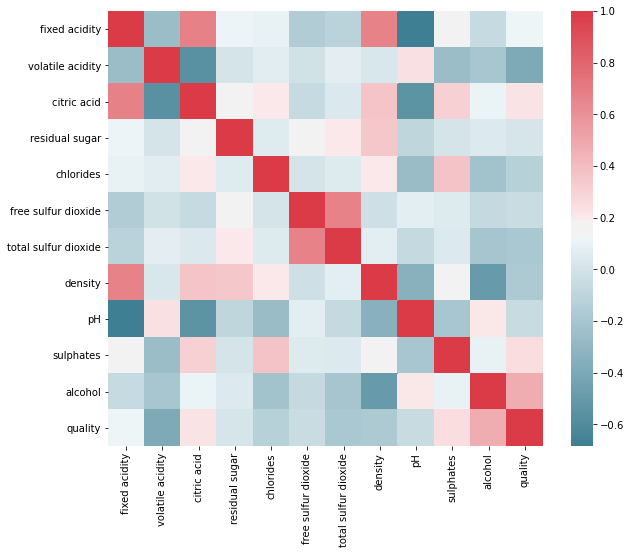

In [11]:
visualize_corr_matrix(data['wine_quality'])

### Example using `get_correlated_features`

<br> This function also takes as input a `target`. This is what we are trying to **predict**. 

The function call `get_correlated_features(df, target)` will return features (attributes) that are correlated with the target feature. Internally, a **threshold** of 0.2 is used on the Pearson Correlation Coefficent (r); although, you can control this with the `threshold` parameter i.e. `get_correlated_features(df, target, threshold=0.4)`

In [12]:
get_correlated_features(data['wine_quality'], target='quality')

Correlations with quality:

fixed acidity           0.124052
volatile acidity       -0.390558
citric acid             0.226373
residual sugar          0.013732
chlorides              -0.128907
free sulfur dioxide    -0.050656
total sulfur dioxide   -0.185100
density                -0.174919
pH                     -0.057731
sulphates               0.251397
alcohol                 0.476166

Optimal features based on absolute threshold: 0.2

volatile acidity    0.390558
citric acid         0.226373
sulphates           0.251397
alcohol             0.476166


# Algorithm Implementations

In [13]:
from algorithms import run, implementations

There are four main types of machine-learing algorithms that are implemented. Below are the following **named** implementations.

In [14]:
implementations

['Simple Linear Regression',
 'Naive Bayes',
 'Random Forest',
 'Support Vector Machines']

## Simple Linear Regression

In the Simple Linear Regression implementation an artificial two-dimensional dataset is generated to nicely visualize the predictions of the model. 

Building Modeling...
Fitting model to data...
Generating Predictions...



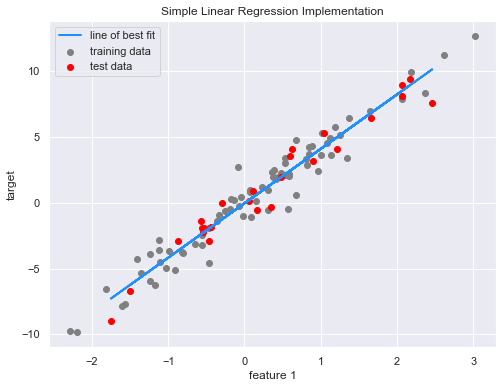

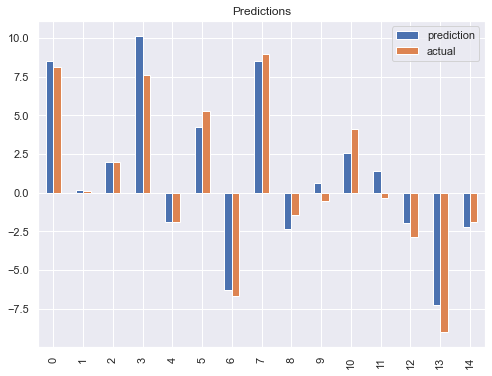

In [15]:
run('Simple Linear Regression')

## Naive Bayes

A variant of Naive Bayes, specifically Multinomial Naive Bayes is demonstrated to classify Amazon Reviews as having either positive (1) or negative (0) sentiment.

### Data Cleaning 

The first step in this workflow is to clean the data. This is a typical first step (after the data is collected) that a Data Scientist will need to do. This can often be one of the most time-consuming phases. The reason for this is that data is often messy and unstructured. In order to apply fancy data science techniques, we need the data to be in a nice format and arriving at this can involve many tedious procedures.

### Data Preprocessing 

Data can be noisy. When dealing with text data it is frequently the case that we want to remove commonly used words. The intuition behind this is that commonly used words are uninformative and an abundance of these words can create "noise" around the true "pattern" or "signal" we are trying to extract from the data. In this example, we are trying to extract the pattern of language which corresponds to positive vs. negative sentiment. 

### Understanding Trends in Generalization Performance

A key theme you will see again and again when practicing data science is "more data the better". Although, not always the case! We need high quality data as well!

The Naive Bayes implementation comes with a nice graphic that allows you to visualize this concept in action.

Preview of Amazon Reviews Dataset (Uncleaned): 


,0,1,2,3,4,5
0,So there is no way for me to plug it in here i...,0,NaN,NaN,NaN,NaN
1,Good case,Excellent value.,1,NaN,NaN,NaN
2,Great for the jawbone.,1,NaN,NaN,NaN,NaN
3,Tied to charger for conversations lasting more...,0,NaN,NaN,NaN,NaN
4,The mic is great.,1,NaN,NaN,NaN,NaN
5,I have to jiggle the plug to get it to line up...,0,NaN,NaN,NaN,NaN
6,If you have several dozen or several hundred c...,then imagine the fun of sending each of them ...,0,NaN,NaN,NaN
7,If you are Razr owner...you must have this!,1,NaN,NaN,NaN,NaN
8,Needless to say,I wasted my money.,0,NaN,NaN,NaN
9,What a waste of money and time!.,0,NaN,NaN,NaN,NaN


Cleaning Dataset...

Preview of Amazon Reviews Dataset (After Data Cleaning Phase): 


,review,sentiment
0,so there is no way for me to plug it in here i...,0
1,good case excellent value,1
2,great for the jawbone,1
3,tied to charger for conversations lasting more...,0
4,the mic is great,1
5,i have to jiggle the plug to get it to line up...,0
6,if you have several dozen or several hundred c...,0
7,if you are razr owneryou must have this,1
8,needless to say i wasted my money,0
9,what a waste of money and time,0



Data Preprocessing...
Removed 107 stop words.

Multinomial Naive Bayes Accuracy: 0.928


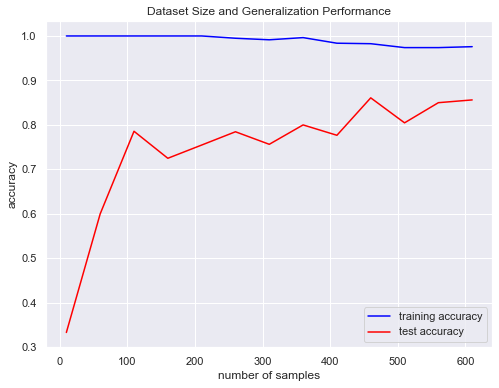

In [16]:
run('Naive Bayes')

## Random Forest

In the Random Forest implementation we generated another two-dimensional toy dataset. However this time the red and blue classes are NOT linearly separable.

A Random Forest is a collection of many machine learning classifiers known as Decision Trees or just trees for short. You can view each tree as a series of "splits" on each feature in order to accurately classify the data points. For example, a potential split to categorize the blue and red data points might be a split on Feature 1 at 0.25 and then another on Feature 0 at -0.25 and so on. These tree are designed to terminate splitting once all of the data points have been correctly classified. Because of this, these types of algorithms are naturally prone to becoming overly complex and as a result will fail to generalize well to unseen data. What this means is that they have essentially memorized in such granular detail the data of which it was trained on the miss the pattern that exists in the general population of data points. This term in machine learning is known as **overfitting** To combat this, randomness is injected into the creation of each tree. The final model is an aggregation of these randmoized trees which we call the **Random Forest**

This implementation displays a few of the unique, randomized trees within the ensemble of trees and also displays the final decision boundary/classifications of the Random Forest.

Accuracy on training set: 0.99
Accuracy on test set: 0.96


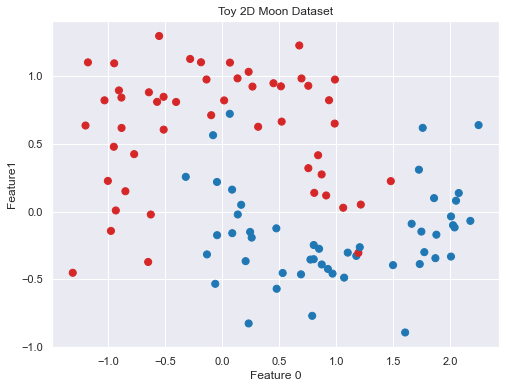

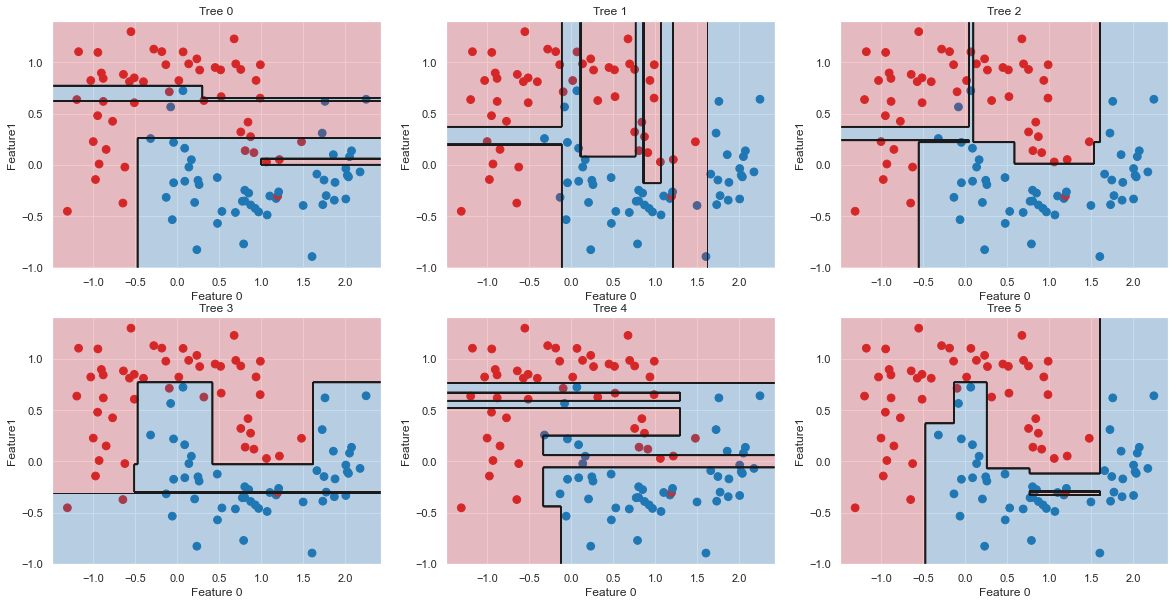

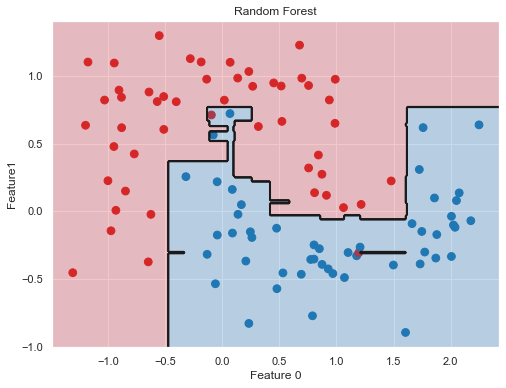

In [17]:
run('Random Forest')

## Support Vector Machines

The last type of ML implementation is called Support Vector Machines. The idea behind this approach is that we may not always have data that is linearly separable but it may be linearly seperable in a different feature representation, typically a higher-dimensional space. This is commonly referred to as the "kernel trick", that is, using a linear classifier to solve a non-linear problem. The Kernel function is what we used to map the original data points into a higher-dimensional space in which they become linearly separable. There a few different types but here we just create another toy two-dimensional dataset and display the output of each method that is implemented in the `scikit-learn` package

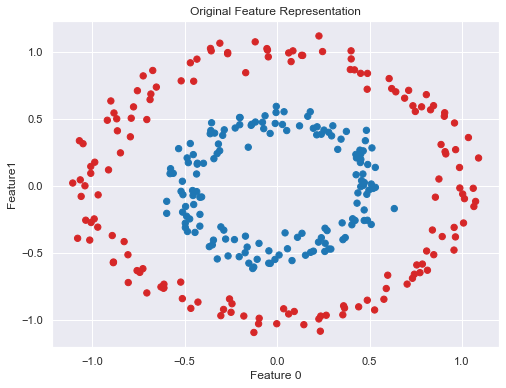

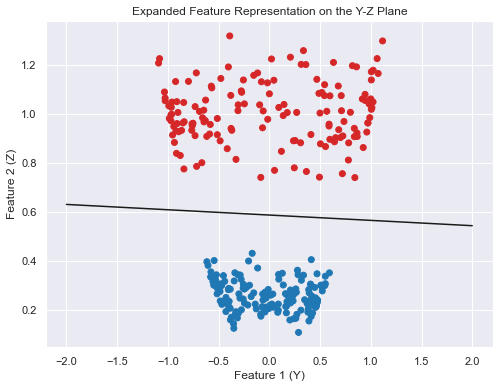

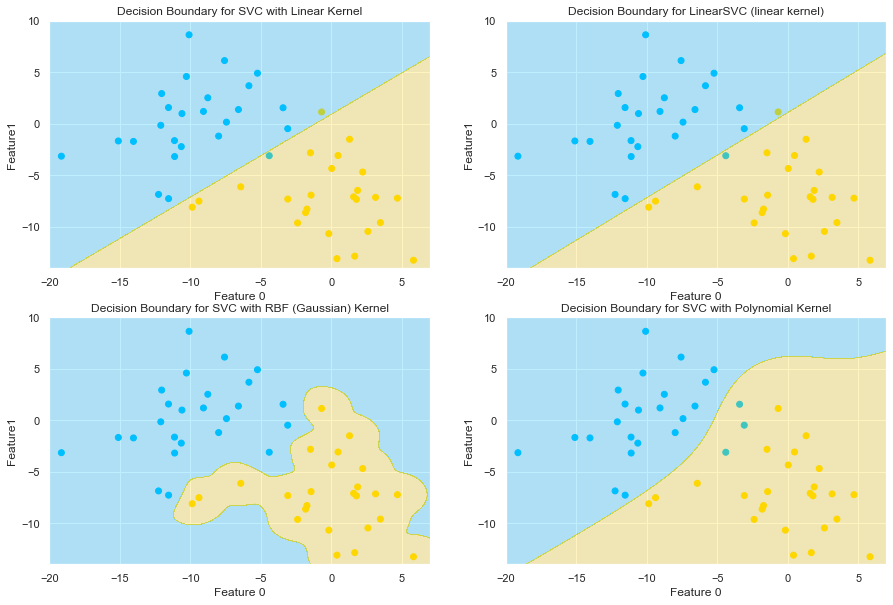

In [18]:
run('Support Vector Machines')